# Pandas Practices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read and write csv
df = pd.read_csv('./data/Daily Bike Sharing training.csv', parse_dates=['dteday'], index_col='dteday')
df.drop(columns=['instant'], inplace=True)
df.info()
df.to_csv('./data/bike_sharing.csv', index=True)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701 entries, 2011-01-01 to 2012-12-01
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      701 non-null    int64  
 1   yr          701 non-null    int64  
 2   mnth        701 non-null    int64  
 3   holiday     701 non-null    int64  
 4   weekday     701 non-null    int64  
 5   workingday  701 non-null    int64  
 6   weathersit  701 non-null    int64  
 7   temp        700 non-null    float64
 8   atemp       701 non-null    float64
 9   hum         701 non-null    float64
 10  windspeed   700 non-null    float64
 11  casual      701 non-null    int64  
 12  registered  701 non-null    int64  
 13  cnt         701 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 82.1 KB


# Filtering

In [3]:
# Select Columns
way1 = df[['season','holiday','temp']]
print(way1.head(1))
way2 = df.loc[:, ['season','holiday','temp']]
print(way2.head(1))
way3 = df.iloc[:, [0, 3, 7]]
print(way3.head(1))

withCondition = df[df['season'] == 1]
print(withCondition.head(1))
withMultiCondition = df[(df['season'] == 1) & (df['temp'] > 0.5)]
print(withMultiCondition.head(1))

            season  holiday      temp
dteday                               
2011-01-01       1        0  0.344167
            season  holiday      temp
dteday                               
2011-01-01       1        0  0.344167
            season  holiday      temp
dteday                               
2011-01-01       1        0  0.344167
            season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-01-01       1   0     1        0        6           0           2   

                temp     atemp       hum  windspeed  casual  registered  cnt  
dteday                                                                        
2011-01-01  0.344167  0.363625  0.805833   0.160446     331         654  985  
            season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-02-18       1   0     2        0        5    

In [4]:
# Select Rows
way1 = df[0:5]
print(way1.head(1))
way2 = df.loc['2011-01-01':'2011-01-05']
print(len(way2))
way3 = df.iloc[0:5]
print(way3.head(1))
way4 = df.loc['2011-01':'2011-02']
print(len(way4))

            season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-01-01       1   0     1        0        6           0           2   

                temp     atemp       hum  windspeed  casual  registered  cnt  
dteday                                                                        
2011-01-01  0.344167  0.363625  0.805833   0.160446     331         654  985  
5
            season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-01-01       1   0     1        0        6           0           2   

                temp     atemp       hum  windspeed  casual  registered  cnt  
dteday                                                                        
2011-01-01  0.344167  0.363625  0.805833   0.160446     331         654  985  
59


In [5]:
# select non-nulls
nonNulls = df[df['temp'].notnull()]
print(len(nonNulls))

# select nulls
nulls = df[df['temp'].isnull()]
print(len(nulls))


700
1


# Analysis

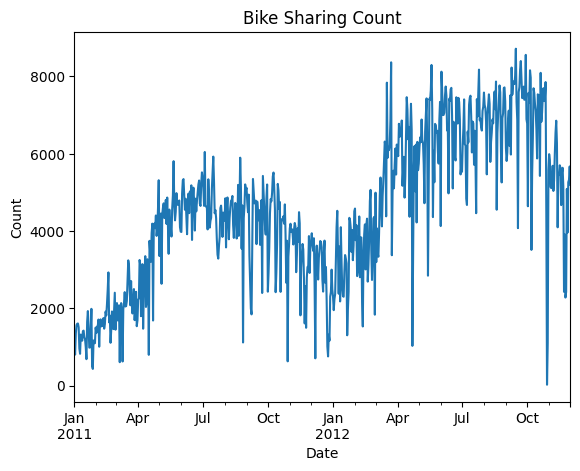

In [6]:
df['cnt'].plot(kind='line')
plt.title('Bike Sharing Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='dteday'>

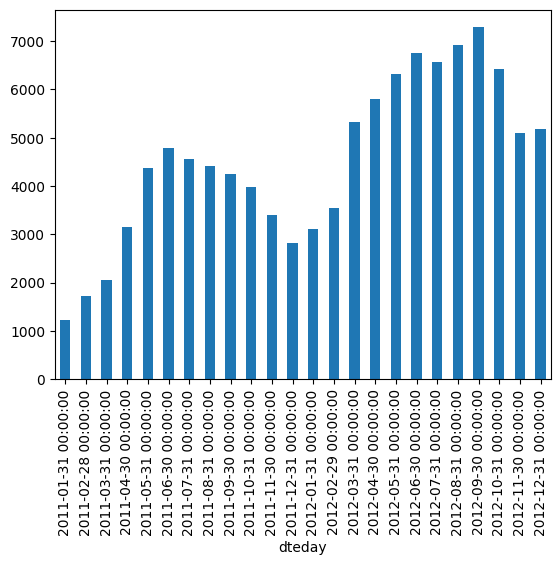

In [7]:
df.resample('ME')['cnt'].mean().plot(kind='bar')

[1 2 3 4]
4
season
3    188
2    184
1    170
4    159
Name: count, dtype: int64
0    3
Name: season, dtype: int64


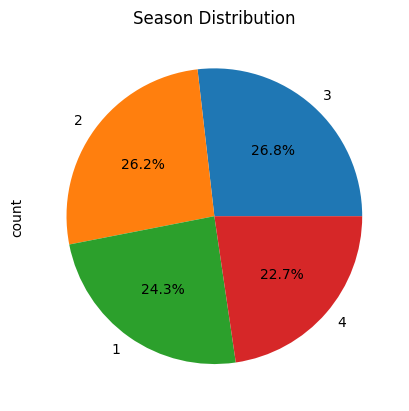

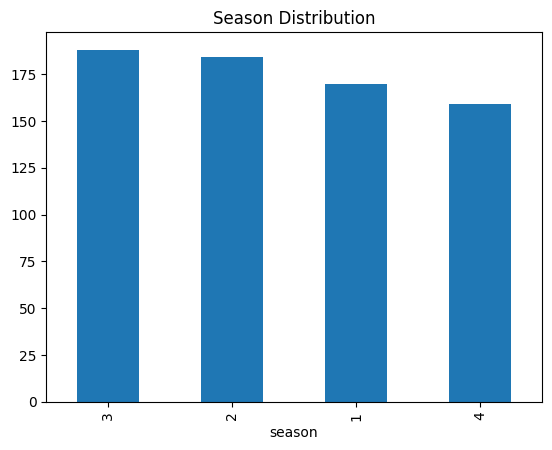

In [8]:
# check unique values
unique = df['season'].unique()
print(unique)
unique = df['season'].nunique()
print(unique)
counts = df['season'].value_counts()
print(counts)
mode = df['season'].mode()
print(mode)
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Season Distribution')
plt.show()
counts.plot(kind='bar')
plt.title('Season Distribution')
plt.show()

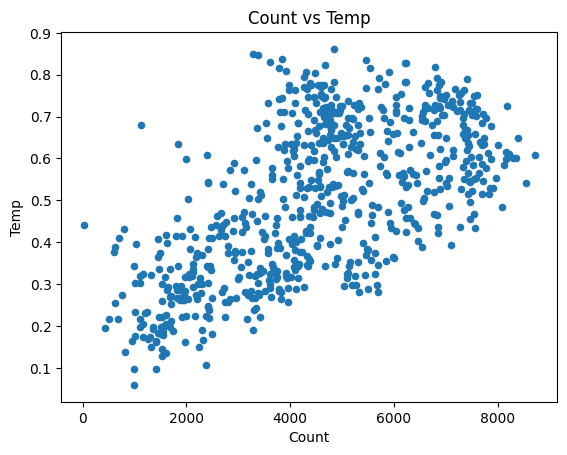

In [9]:
df.plot(x='cnt', y='temp', kind='scatter')
plt.title('Count vs Temp')
plt.xlabel('Count') 
plt.ylabel('Temp')
plt.show()

In [10]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.018468,0.888259,0.003252,0.001675,0.002616,0.027967,0.354650,0.361088,0.197789,-0.219030,0.224888,0.385498,0.389125
yr,-0.018468,1.000000,-0.075413,0.007096,-0.002051,-0.000438,-0.070664,0.090738,0.089890,-0.131842,-0.012141,0.285067,0.626250,0.603446
mnth,0.888259,-0.075413,1.000000,0.018786,0.016310,-0.003643,0.015002,0.306501,0.315166,0.214648,-0.226468,0.178192,0.324182,0.323326
holiday,0.003252,0.007096,0.018786,1.000000,-0.103099,-0.252561,-0.042729,-0.027441,-0.031453,-0.020553,0.008913,0.056635,-0.097805,-0.058080
weekday,0.001675,-0.002051,0.016310,-0.103099,1.000000,0.033660,0.036604,-0.001419,-0.006030,-0.041907,0.007052,0.059137,0.055924,0.065928
workingday,0.002616,-0.000438,-0.003643,-0.252561,0.033660,1.000000,0.062988,0.049861,0.050852,0.031885,-0.025126,-0.530664,0.297028,0.048162
weathersit,0.027967,-0.070664,0.015002,-0.042729,0.036604,0.062988,1.000000,-0.103675,-0.105342,0.590193,0.044069,-0.241775,-0.252543,-0.288684
temp,0.354650,0.090738,0.306501,-0.027441,-0.001419,0.049861,-0.103675,1.000000,0.991524,0.141798,-0.165312,0.533068,0.550122,0.631486
atemp,0.361088,0.089890,0.315166,-0.031453,-0.006030,0.050852,-0.105342,0.991524,1.000000,0.152682,-0.189120,0.534106,0.553086,0.633885
hum,0.197789,-0.131842,0.214648,-0.020553,-0.041907,0.031885,0.590193,0.141798,0.152682,1.000000,-0.236729,-0.072878,-0.094094,-0.101409


In [11]:
# find max temp
maxTemp = df['temp'].max()
print(maxTemp)
maxTempIndex = df['temp'].idxmax()
print(maxTempIndex)

0.861667
2012-07-07 00:00:00


In [12]:
# resample
df.resample('ME').mean()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-31,1.000000,0.0,1.0,0.032258,2.935484,0.645161,1.483871,0.192181,0.204490,0.584366,0.196200,99.129032,1132.774194,1231.903226
2011-02-28,1.000000,0.0,2.0,0.035714,3.000000,0.678571,1.321429,0.282540,0.284412,0.560093,0.228568,222.928571,1499.035714,1721.964286
2011-03-31,1.354839,0.0,3.0,0.000000,3.000000,0.741935,1.516129,0.331667,0.325299,0.569414,0.232408,413.741935,1652.225806,2065.967742
2011-04-30,2.000000,0.0,4.0,0.033333,3.166667,0.666667,1.566667,0.471188,0.456775,0.668287,0.244216,744.866667,2417.466667,3162.333333
2011-05-31,2.000000,0.0,5.0,0.032258,2.806452,0.677419,1.387097,0.577231,0.550814,0.713360,0.181274,1001.612903,3379.709677,4381.322581
2011-06-30,2.333333,0.0,6.0,0.000000,3.033333,0.733333,1.300000,0.693083,0.646559,0.593250,0.178195,1020.400000,3763.333333,4783.733333
2011-07-31,3.000000,0.0,7.0,0.032258,3.064516,0.645161,1.129032,0.758575,0.710660,0.589664,0.171667,1175.870968,3383.516129,4559.387097
2011-08-31,3.000000,0.0,8.0,0.000000,2.903226,0.741935,1.258065,0.705362,0.655415,0.626831,0.190721,930.387097,3479.000000,4409.387097
2011-09-30,3.266667,0.0,9.0,0.033333,3.100000,0.700000,1.733333,0.612887,0.568545,0.784054,0.152989,884.833333,3362.433333,4247.266667


# Sort

In [13]:
# Sort single
temp_data = df[df['temp'].notnull()]
temp_data.sort_values(by='temp', ascending=False).head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840
2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285
2011-07-22,3,0,7,0,5,1,1,0.848333,0.840896,0.580417,0.133100,562,2825,3387
2011-07-29,3,0,7,0,5,1,1,0.838333,0.785967,0.542500,0.174138,670,3176,3846
2012-06-29,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463


In [14]:
# Sort multiple
temp_data.sort_values(by=['cnt', 'temp'], ascending=[True, False]).head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2012-10-29,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22
2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431
2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623


# Data cleaning and preparation

In [15]:
# handle nulls
# df = df.fillna(0)
# df = df.dropna()
df = df.bfill()

In [16]:
# add new column
df['totalTemp'] = df[['temp', 'atemp']].sum(axis=1)
df.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,totalTemp
dteday,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.707792


In [17]:
# drop columns
df.drop(columns=['totalTemp'], inplace=True)
df.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


<Axes: >

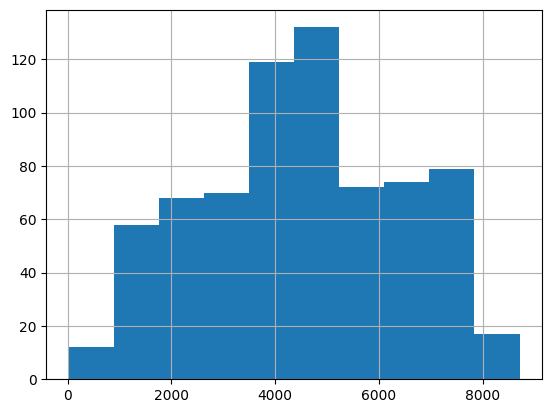

In [18]:
# plot amount 
df['cnt'].hist()

array([[<Axes: title={'center': 'cnt'}>]], dtype=object)

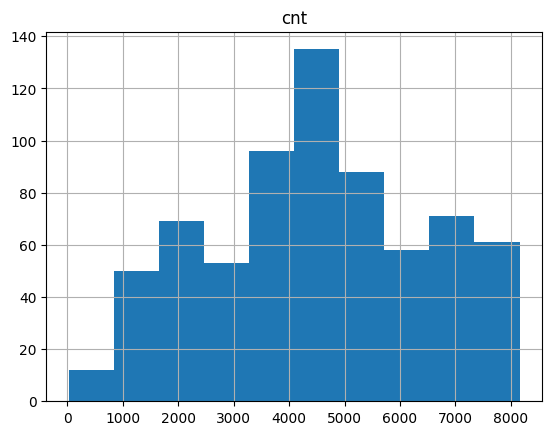

In [19]:
# Remove outliers

df[df['cnt'] < df['cnt'].quantile(0.99)].hist(column='cnt')

# Grouping

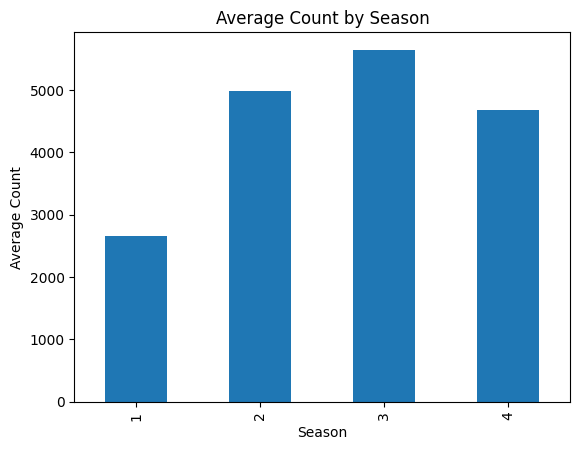

In [20]:
df.groupby('season')['cnt'].mean().plot(kind='bar')
plt.title('Average Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Count')
plt.show()

# Merge

In [21]:
df_customer = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
})
df_orders = pd.DataFrame({
    'id': ["order1", "order2", "order3"],
    'product': ['Laptop', 'Tablet', 'Phone'],
    'price': [1000, 500, 300],
    'customer_id': [3, 2, 1],
})
pd.merge(df_customer, df_orders, left_on='id', right_on='customer_id', how='outer')

,id_x,name,id_y,product,price,customer_id
0,1,Alice,order3,Phone,300,1
1,2,Bob,order2,Tablet,500,2
2,3,Charlie,order1,Laptop,1000,3


In [22]:
pd.merge(df_customer, df_orders, left_on='id', right_on='customer_id', how='inner')

,id_x,name,id_y,product,price,customer_id
0,1,Alice,order3,Phone,300,1
1,2,Bob,order2,Tablet,500,2
2,3,Charlie,order1,Laptop,1000,3


# Random data frame

In [23]:
df_sales = pd.DataFrame(
    np.random.randint(1, 100, (30,5)),
    columns=['id', 'product', 'price', 'customer_id', 'date']
)
df_sales.head()

,id,product,price,customer_id,date
0,45,71,27,66,47
1,38,1,94,9,37
2,67,64,82,27,48
3,86,5,31,98,21
4,11,70,63,64,47


# Table Pivot

In [24]:
data = {
    'Date': ['2025-04-01', '2025-04-01', '2025-04-02', '2025-04-02'],
    'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Temperature': [55, 75, 60, 78]
}

df = pd.DataFrame(data)
df



,Date,City,Temperature
0,2025-04-01,New York,55
1,2025-04-01,Los Angeles,75
2,2025-04-02,New York,60
3,2025-04-02,Los Angeles,78


In [25]:
# Pivot the DataFrame
pivot_df = df.pivot(index='Date', columns='City', values='Temperature')

# Display the pivoted DataFrame
pivot_df

City,Los Angeles,New York
Date,,
2025-04-01,75,55
2025-04-02,78,60


In [26]:
# Revert the pivoted DataFrame back to the original structure
original_df = pivot_df.reset_index().melt(id_vars='Date', var_name='City', value_name='Temperature')

# Display the reverted DataFrame
original_df

,Date,City,Temperature
0,2025-04-01,Los Angeles,75
1,2025-04-02,Los Angeles,78
2,2025-04-01,New York,55
3,2025-04-02,New York,60


In [27]:
# Pivot with 2 columns
# Create a sample DataFrame
data = {
    'Date': ['2025-04-01', '2025-04-01', '2025-04-02', '2025-04-02', '2025-04-03'],
    'Device': ['A', 'B', 'A', 'B', 'A'],
    'Metric': ['Temperature', 'Temperature', 'Humidity', 'Humidity', 'Temperature'],
    'Value': [65, 75, 55, 60, 70],
    'Value2': [0.5, 0.6, 0.7, 0.8, 0.4]
}
df = pd.DataFrame(data)
df['no'] = df.groupby(['Device', 'Metric']).cumcount()
df['has_more_than_one'] = df.groupby(['Device', 'Metric'])['no'].transform('max') > 0

df



,Date,Device,Metric,Value,Value2,no,has_more_than_one
0,2025-04-01,A,Temperature,65,0.5,0,True
1,2025-04-01,B,Temperature,75,0.6,0,False
2,2025-04-02,A,Humidity,55,0.7,0,False
3,2025-04-02,B,Humidity,60,0.8,0,False
4,2025-04-03,A,Temperature,70,0.4,1,True


In [28]:
# Pivot the DataFrame based on two columns: 'City' and 'Metric'
pivot_df = df.pivot(index=['no'], columns=['Device', 'Metric'])
# pivot_df.columns = pivot_df.columns.set_names("type", level=0)
pivot_df

Date                                           Value  \
Device           A           B           A           B           A   
Metric Temperature Temperature    Humidity    Humidity Temperature   
no                                                                   
0       2025-04-01  2025-04-01  2025-04-02  2025-04-02        65.0   
1       2025-04-03         NaN         NaN         NaN        70.0   

                                          Value2                       \
Device           B        A        B           A           B        A   
Metric Temperature Humidity Humidity Temperature Temperature Humidity   
no                                                                      
0             75.0     55.0     60.0         0.5         0.6      0.7   
1              NaN      NaN      NaN         0.4         NaN      NaN   

                has_more_than_one                                
Device        B                 A           B        A        B  
Metric Humidity       Temperature Temperature Humidity Humidity  
no                                                               
0           0.8              True       False    False    False  
1           NaN              True         NaN      NaN      NaN

In [29]:
stacked_df = pivot_df.stack(level=[1, 2]).reset_index()
stacked_df

/var/folders/zr/55ct9rx16hb8nk7z_w9q07900000gn/T/ipykernel_2731/2432548368.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_df = pivot_df.stack(level=[1, 2]).reset_index()


,no,Device,Metric,Date,Value,Value2,has_more_than_one
0,0,A,Humidity,2025-04-02,55.0,0.7,False
1,0,A,Temperature,2025-04-01,65.0,0.5,True
2,0,B,Humidity,2025-04-02,60.0,0.8,False
3,0,B,Temperature,2025-04-01,75.0,0.6,False
4,1,A,Temperature,2025-04-03,70.0,0.4,True


In [30]:
df_final = stacked_df[['Date', 'Device', 'Metric', 'Value', 'Value2', 'no']]
df_final.drop(columns=['no'], inplace=True)
df_final

/var/folders/zr/55ct9rx16hb8nk7z_w9q07900000gn/T/ipykernel_2731/3478631001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=['no'], inplace=True)


,Date,Device,Metric,Value,Value2
0,2025-04-02,A,Humidity,55.0,0.7
1,2025-04-01,A,Temperature,65.0,0.5
2,2025-04-02,B,Humidity,60.0,0.8
3,2025-04-01,B,Temperature,75.0,0.6
4,2025-04-03,A,Temperature,70.0,0.4


# Multi-index DataFrame


In [31]:
# Create a MultiIndex
index = pd.MultiIndex.from_tuples(
    [('A', 1), ('A', 2), ('B', 1), ('B', 2)],
    names=['Group', 'Subgroup']
)

# Create a DataFrame with MultiIndex
data = pd.DataFrame(
    np.random.randn(4, 2),
    index=index,
    columns=['Value1', 'Value2']
)
data

Value1    Value2
Group Subgroup                    
A     1         0.678978  0.954226
      2        -0.722853  0.670950
B     1         0.141302  0.075697
      2         2.681739  0.325662

In [32]:
data.loc['A']  # Select all rows with Group 'A'

,Value1,Value2
Subgroup,,
1,0.678978,0.954226
2,-0.722853,0.670950


In [33]:
data.loc['A', 1]  # Select row with Group 'A' and Subgroup 1

Value1    0.678978
Value2    0.954226
Name: (A, 1), dtype: float64

# reset-index

In [34]:
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data, index=['x', 'y', 'z'])
print("Original DataFrame:")
print(df)
# Resetting the index
df_reset = df.reset_index()
print("\nDataFrame after reset_index:")
print(df_reset)
# Resetting the index and dropping the old index
df_reset_drop = df.reset_index(drop=True)
print("\nDataFrame after reset_index with drop=True:")
print(df_reset_drop)

Original DataFrame:
   A  B
x  1  4
y  2  5
z  3  6

DataFrame after reset_index:
  index  A  B
0     x  1  4
1     y  2  5
2     z  3  6

DataFrame after reset_index with drop=True:
   A  B
0  1  4
1  2  5
2  3  6


# Numpy einsum

In [35]:
import numpy as np
a = np.array([1, 2, 3])
result = np.einsum('i->', a)  # Sum over all elements
print(result)


a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
result = np.einsum('i,i->', a, b)  # Dot product
print(result)

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
result = np.einsum('ij,jk->ik', a, b)  # Matrix multiplication
print(result)

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
result = np.einsum('ij,jk->i', a, b)  # Dot product
print(result)

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
result = np.einsum('ij,jk->ik', a, b)  # Matrix multiplication
print(result)



6
32
[[19 22]
 [43 50]]
[41 93]
[[19 22]
 [43 50]]


# groupby and agg

In [36]:
data = {
    'Date': ['2025-04-01', '2025-04-01', '2025-04-02', '2025-04-02', '2025-04-03'],
    'Device': ['A', 'B', 'A', 'B', 'A'],
    'Metric': ['Temperature', 'Temperature', 'Humidity', 'Humidity', 'Temperature'],
    'Value': [65, 75, 55, 60, 70],
    'Value2': [0.5, 0.6, 0.7, 0.8, 0.4]
}
df = pd.DataFrame(data)
result = df.groupby(['Device', 'Metric']).agg(
    Avg_Value=('Value', 'mean'),
    Sum_Value2=('Value2', 'sum'),
    Custom_Calculation=('Value', lambda x: (x * df.loc[x.index, 'Value2']).sum())  # Multiply Value and Value2
)

print(result)

                    Avg_Value  Sum_Value2  Custom_Calculation
Device Metric                                                
A      Humidity          55.0         0.7                38.5
       Temperature       67.5         0.9                60.5
B      Humidity          60.0         0.8                48.0
       Temperature       75.0         0.6                45.0


In [37]:
from scipy.stats import norm
pd.DataFrame({"day1":[0,0,0,0,0], "day2":[1,2,3,4,5]}).std()  # Standard deviation
# norm.ppf(0.95, loc=1, scale=0)  # 95% confidence interval

day1    0.000000
day2    1.581139
dtype: float64

## groupby and apply

In [38]:
data = []
for d in range(10):
    for m in range(10):
        for i in range(20):
            data.append({
                'device': f'device_{d}',
                'metric': f'metric_{d}_{m}',
                'timestamp': pd.Timestamp('2023-10-01') + pd.Timedelta(minutes=i),
                'value': np.random.rand(),
                'value2': np.random.rand() if i < 19 else None,
            })
df = pd.DataFrame(data)
df

,device,metric,timestamp,value,value2
0,device_0,metric_0_0,2023-10-01 00:00:00,0.571467,0.791268
1,device_0,metric_0_0,2023-10-01 00:01:00,0.853426,0.127396
2,device_0,metric_0_0,2023-10-01 00:02:00,0.009692,0.551429
3,device_0,metric_0_0,2023-10-01 00:03:00,0.981457,0.595691
4,device_0,metric_0_0,2023-10-01 00:04:00,0.304394,0.418209
...,...,...,...,...,...
1995,device_9,metric_9_9,2023-10-01 00:15:00,0.293301,0.732956
1996,device_9,metric_9_9,2023-10-01 00:16:00,0.870291,0.610552
1997,device_9,metric_9_9,2023-10-01 00:17:00,0.587485,0.327443
1998,device_9,metric_9_9,2023-10-01 00:18:00,0.035605,0.249695


In [39]:
# Group by 'device' and 'metric' and perform a complex calculation
def complex_calculation(group):
    # Example: Calculate weighted average using 'value' and 'value2'
    weighted_avg = (group['value'] * group['value2']).sum() / group['value2'].sum()
    
    # Example: Calculate the range of 'value'
    value_range = group['value'].max() - group['value'].min()
    
    # Return the results as a dictionary
    return pd.Series({
        'Weighted_Avg': weighted_avg,
        'Value_Range': value_range
    })

# Perform the groupby and apply the custom function
result = df.groupby(['device', 'metric'], group_keys=False).apply(complex_calculation, include_groups=False)

# Display the result
print(result)

                     Weighted_Avg  Value_Range
device   metric                               
device_0 metric_0_0      0.585421     0.986822
         metric_0_1      0.547890     0.968965
         metric_0_2      0.523745     0.973770
         metric_0_3      0.449892     0.845731
         metric_0_4      0.381798     0.889541
...                           ...          ...
device_9 metric_9_5      0.610539     0.917274
         metric_9_6      0.408427     0.824762
         metric_9_7      0.515140     0.935552
         metric_9_8      0.387084     0.827254
         metric_9_9      0.499308     0.930259

[100 rows x 2 columns]


# Detect duplicates

In [40]:
data = []
for d in range(10):
    for m in range(10):
        for i in range(20):
            data.append({
                'device': f'device_{d}',
                'metric': f'metric_{m}',
                'timestamp': pd.Timestamp('2023-10-01') + pd.Timedelta(days=i),
                'value': np.random.rand(),
                'value2': np.random.rand() if i < 19 else None,
            })
df = pd.DataFrame(data)

new_df = pd.DataFrame({
    'device': ['device_1', 'device_2', 'device_1'],
    'metric': ['metric_1', 'metric_2', 'metric_x'],
    'timestamp': [pd.Timestamp('2023-10-01'), pd.Timestamp('2023-10-02'), pd.Timestamp('2023-10-03')],
    'value': [1.0, 2.0, 3.0],
    'value2': [0.5, 0.6, 0.7],
})

key_columns = ['device', 'metric', 'timestamp']
duplicated_indexes = new_df.set_index(key_columns).index.isin(df.set_index(key_columns).index)
duplicated_rows = new_df[duplicated_indexes]
print("Duplicated Rows:")
print(duplicated_rows)
not_duplicated_rows = new_df[~duplicated_indexes]
print("Not Duplicated Rows:")
print(not_duplicated_rows)

Duplicated Rows:
     device    metric  timestamp  value  value2
0  device_1  metric_1 2023-10-01    1.0     0.5
1  device_2  metric_2 2023-10-02    2.0     0.6
Not Duplicated Rows:
     device    metric  timestamp  value  value2
2  device_1  metric_x 2023-10-03    3.0     0.7


# Split Dataframe with info in another Dataframe

In [41]:
data = []
for d in range(10):
    for m in range(10):
        for i in range(20):
            data.append({
                'device': f'device_{d}',
                'metric': f'metric_{m}',
                'timestamp': pd.Timestamp('2023-10-01') + pd.Timedelta(days=i),
                'value': np.random.rand(),
                'value2': np.random.rand() if i < 19 else None,
            })
df = pd.DataFrame(data)

settings_df = pd.DataFrame({
    'device': ['device_1', 'device_2', 'device_1'],
    'metric': ['metric_1', 'metric_2', 'metric_x'],
    'setting': ['setting_1', 'setting_2', 'setting_x'],
})

df_merged_settings = df.merge(settings_df, on=['device', 'metric'], how='left', indicator=True)
df_with_settings = df_merged_settings[df_merged_settings['_merge'] == 'both'].drop(columns=['_merge'])
print("DataFrame with Settings:")
print(len(df_with_settings))
df_without_settings = df_merged_settings[df_merged_settings['_merge'] == 'left_only'].drop(columns=['_merge'])
print("DataFrame without Settings:")
print(len(df_without_settings))

DataFrame with Settings:
40
DataFrame without Settings:
1960


## Detect Duplication 2

In [42]:
import pandas as pd
import numpy as np

data = []
start_seq = 120
for d in range(10):
    for m in range(10):
        for i in range(20):
            data.append({
                'device': f'device_{d}',
                'metric': f'metric_{m}',
                'timestamp': pd.Timestamp('2023-10-01') + pd.Timedelta(days=i),
                'seq': start_seq + i,
                'value': np.random.rand(),
                'value2': np.random.rand() if i < 19 else None,
            })
df = pd.DataFrame(data)

input = []
for d in range(10):
    for m in range(10):
        if d == 2 and m == 2:
            continue
        input.append({
            'device': f'device_{d}',
            'metric': f'metric_{m}',
            'timestamp': pd.Timestamp('2023-10-01') + pd.Timedelta(days=20),
            'value': np.random.rand(),
            'value2': None,
        })
# duplicate inside input
input.append({
    'device': f'device_1',
            'metric': f'metric_1',
            'timestamp': pd.Timestamp('2023-10-01') + pd.Timedelta(days=1),
            'value': np.random.rand(),
            'value2': None,
})
# duplicate with existing
input.append({
    'device': f'device_2',
            'metric': f'metric_2',
            'timestamp': pd.Timestamp('2023-10-01') + pd.Timedelta(days=1),
            'value': np.random.rand(),
            'value2': None,
})
input_df = pd.DataFrame(input)

# 1. Check for duplicates
input_df['input_error'] = np.nan
dup_mask = input_df.duplicated(subset=['device', 'metric'], keep=False)
input_df.loc[dup_mask, 'input_error'] = 'duplicated'

# 2. Check for timestamp conflicts (only where not already duplicated)
latest_timestamps = df.groupby(['device', 'metric'])['timestamp'].max().reset_index()
latest_timestamps = latest_timestamps.rename(columns={'timestamp': 'latest_timestamp'})

merged = input_df.merge(latest_timestamps, on=['device', 'metric'], how='left')

conflict_mask = (merged['timestamp'] <= merged['latest_timestamp']) & (merged['input_error'].isna())
input_df.loc[conflict_mask, 'input_error'] = 'conflicted'

print(input_df[input_df['input_error'].notna()])


       device    metric  timestamp     value value2 input_error
11   device_1  metric_1 2023-10-21  0.016615   None  duplicated
99   device_1  metric_1 2023-10-02  0.319400   None  duplicated
100  device_2  metric_2 2023-10-02  0.804091   None  conflicted


/var/folders/zr/55ct9rx16hb8nk7z_w9q07900000gn/T/ipykernel_2731/87478254.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'duplicated' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  input_df.loc[dup_mask, 'input_error'] = 'duplicated'


# Merge with index

In [ ]:
data = []
for d in range(100):
    for m in range(1000):
        for i in range(20):
            data.append({
                'device': f'device_{d}',
                'metric': f'metric_{m}',
                'timestamp': pd.Timestamp('2023-10-01') + pd.Timedelta(days=i),
                'value': np.random.rand(),
                'value2': np.random.rand() if i < 19 else None,
            })
df = pd.DataFrame(data)
df.set_index(['device', 'metric'], inplace=True)
settings = []
for d in range(100):
    for m in range(1000):
        settings.append({
            'device': f'device_{d}',
            'metric': f'metric_{m}',
            'setting': np.random.rand(),
        })
settings_df = pd.DataFrame(settings)
settings_df.set_index(['device', 'metric'], inplace=True)



In [ ]:

# merged_df = df.merge(settings_df, on=['device', 'metric'], how='left')
# merged_df
# Merge DataFrames
merged_df = df.merge(settings_df, left_index=True, right_index=True, how='left')
merged_df

# Conclusion: its not worth to use index for merge, it is slower than using columns

timestamp     value    value2   setting
device    metric                                             
device_0  metric_0   2023-10-01  0.080042  0.701596  0.236470
          metric_0   2023-10-02  0.402496  0.356032  0.236470
          metric_0   2023-10-03  0.728923  0.893826  0.236470
          metric_0   2023-10-04  0.241726  0.579696  0.236470
          metric_0   2023-10-05  0.724543  0.661370  0.236470
...                         ...       ...       ...       ...
device_99 metric_999 2023-10-16  0.935027  0.804262  0.492633
          metric_999 2023-10-17  0.575100  0.364380  0.492633
          metric_999 2023-10-18  0.943900  0.331730  0.492633
          metric_999 2023-10-19  0.076683  0.169726  0.492633
          metric_999 2023-10-20  0.055031       NaN  0.492633

[2000000 rows x 4 columns]